In [38]:
from scipy.io import wavfile
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt


np.set_printoptions(precision=3,edgeitems=5,suppress=True,linewidth=50)

In [39]:
rate, audio = wavfile.read('SimpleFlute.wav')

# audio = np.mean(audio, axis=1)

M = 1024

print("creating spectrogram")
freqs, times, spectro = signal.spectrogram(audio, fs=rate, window='hanning',nperseg=1024, noverlap=M - 100,detrend=False, scaling='spectrum')
print("made spectrogram")

print("len(freqs)",len(freqs))
print("len(times)",len(times))

# spectro = np.swapaxes(spectro,0,1)
print(spectro.shape)

creating spectrogram


made spectrogram
len(freqs) 513
len(times) 14943
(513, 14943)


In [40]:
from sklearn import preprocessing

print(spectro)

spectro = np.log10(spectro + 1)

print(spectro)

spectro = (spectro - np.min(spectro))/np.ptp(spectro)

# xmax, xmin = spectro.max(), spectro.min()
# spectro = (spectro - xmin)/(xmax - xmin)

print(spectro)

# spectro = np.log10(spectro)

print(spectro)

[[   0.       0.       0.       0.       0.
  ...  739.84   498.281  306.31   170.546
    23.091]
 [   0.       0.       0.       0.       0.
  ... 1366.083 1607.033 1009.927  299.801
    81.706]
 [   0.       0.       0.       0.       0.
  ... 2954.301 3681.437 3624.767 3140.898
  2946.822]
 [   0.       0.       0.       0.       0.
  ... 3088.346 2199.397 1609.921 1052.531
   743.301]
 [   0.       0.       0.       0.       0.
  ...  257.712  289.292  109.678    2.149
    43.47 ]
 ...
 [   0.       0.       0.       0.       0.
  ...    0.       0.       0.       0.
     0.   ]
 [   0.       0.       0.       0.       0.
  ...    0.       0.       0.       0.
     0.   ]
 [   0.       0.       0.       0.       0.
  ...    0.       0.       0.       0.
     0.   ]
 [   0.       0.       0.       0.       0.
  ...    0.       0.       0.       0.
     0.   ]
 [   0.       0.       0.       0.       0.
  ...    0.       0.       0.       0.
     0.   ]]


[[0.    0.    0.    0.    0.    ... 2.87  2.698
  2.488 2.234 1.382]
 [0.    0.    0.    0.    0.    ... 3.136 3.206
  3.005 2.478 1.918]
 [0.    0.    0.    0.    0.    ... 3.471 3.566
  3.559 3.497 3.47 ]
 [0.    0.    0.    0.    0.    ... 3.49  3.343
  3.207 3.023 2.872]
 [0.    0.    0.    0.    0.    ... 2.413 2.463
  2.044 0.498 1.648]
 ...
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]]
[[0.    0.    0.    0.    0.    ... 0.335 0.315
  0.29  0.261 0.161]
 [0.    0.    0.    0.    0.    ... 0.366 0.374
  0.351 0.289 0.224]
 [0.    0.    0.    0.    0.    ... 0.405 0.416
  0.415 0.408 0.405]
 [0.    0.    0.    0.    0.    ... 0.407 0.39
  0.374 0.353 0.335]
 [0.    0.    0.    0.    0.    ... 0.281 0.

In [41]:

#Cast entire numpy array to float in range 0-1
# spectro = spectro.astype(np.float64) / (spectro.max())

#scale by 255 for uint8
spectro = 255 * spectro

print(spectro)

spectro = spectro.astype(np.uint8)



[[  0.      0.      0.      0.      0.    ...
   85.365  80.267  73.997  66.466  41.106]
 [  0.      0.      0.      0.      0.    ...
   93.28   95.377  89.381  73.721  57.041]
 [  0.      0.      0.      0.      0.    ...
  103.239 106.081 105.881 104.03  103.207]
 [  0.      0.      0.      0.      0.    ...
  103.812  99.429  95.4    89.914  85.425]
 [  0.      0.      0.      0.      0.    ...
   71.774  73.262  60.804  14.819  49.025]
 ...
 [  0.      0.      0.      0.      0.    ...
    0.004   0.003   0.003   0.003   0.002]
 [  0.      0.      0.      0.      0.    ...
    0.      0.      0.      0.      0.003]
 [  0.      0.      0.      0.      0.    ...
    0.001   0.001   0.001   0.002   0.005]
 [  0.      0.      0.      0.      0.    ...
    0.001   0.002   0.003   0.003   0.003]
 [  0.      0.      0.      0.      0.    ...
    0.002   0.001   0.      0.      0.   ]]


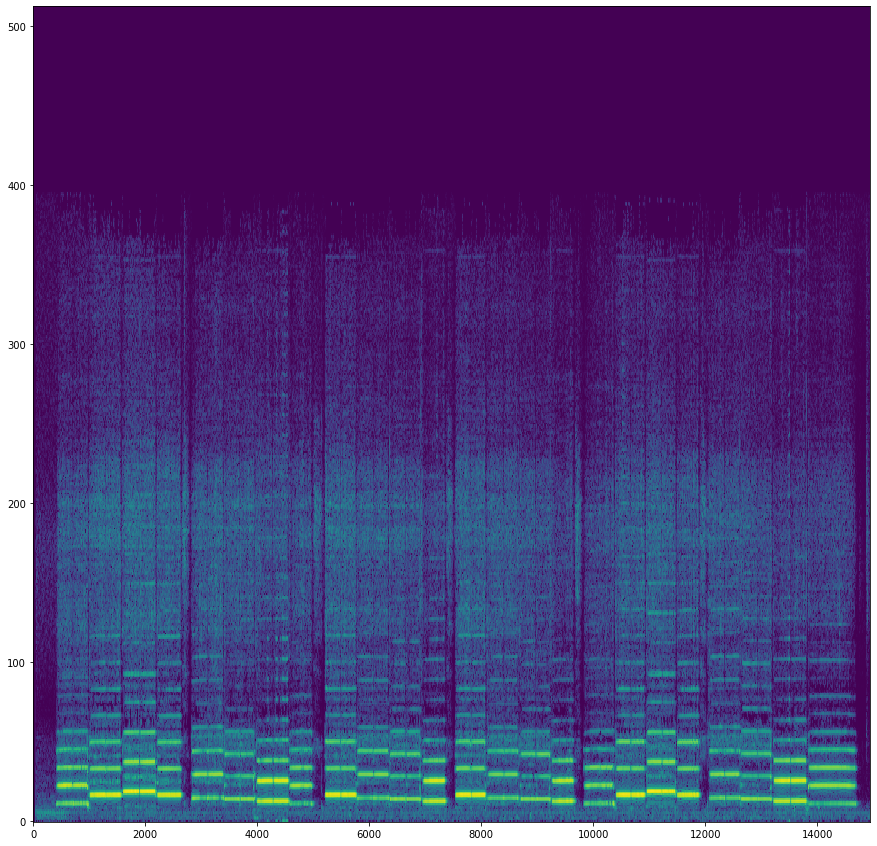

In [42]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(spectro ,aspect='auto')
ax.invert_yaxis()
plt.show()


In [43]:
print("Running denoising function")
%time spectro = cv2.fastNlMeansDenoising(spectro,None,5,11)

Running denoising function


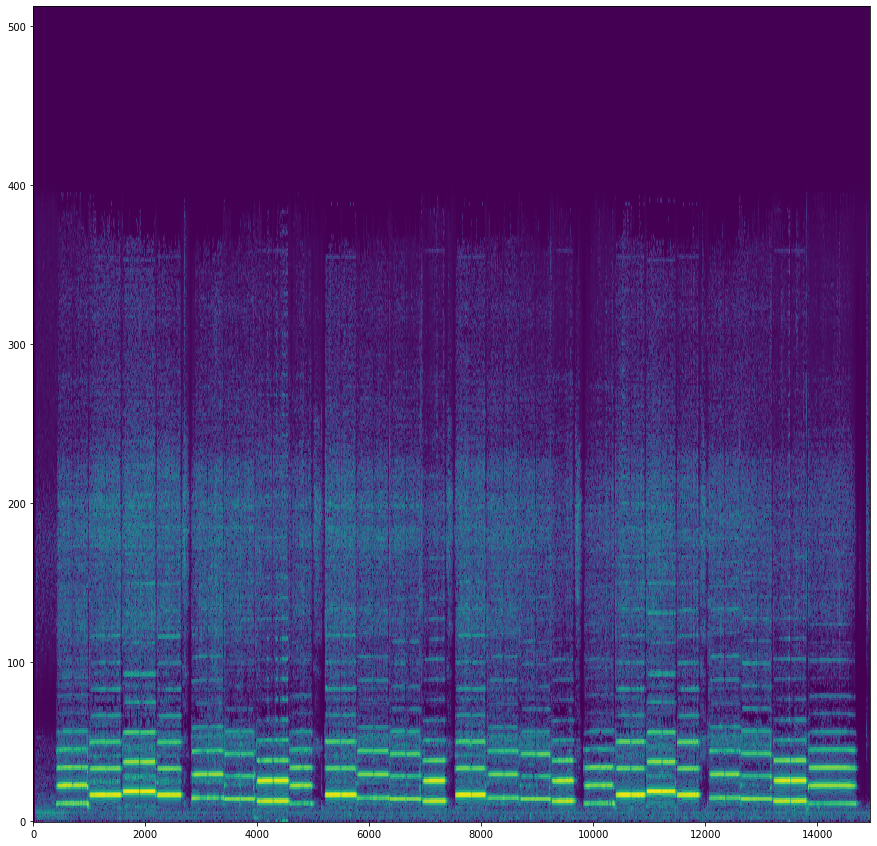

In [49]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(spectro ,aspect='auto')
ax.invert_yaxis()
plt.show()

In [45]:
print("Running threshold function")

# spectro = spectro.astype(np.uint8)
thresh = cv2.adaptiveThreshold(spectro,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

# blur = cv2.GaussianBlur(spectro,(5,5),0)
# ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

Running threshold function


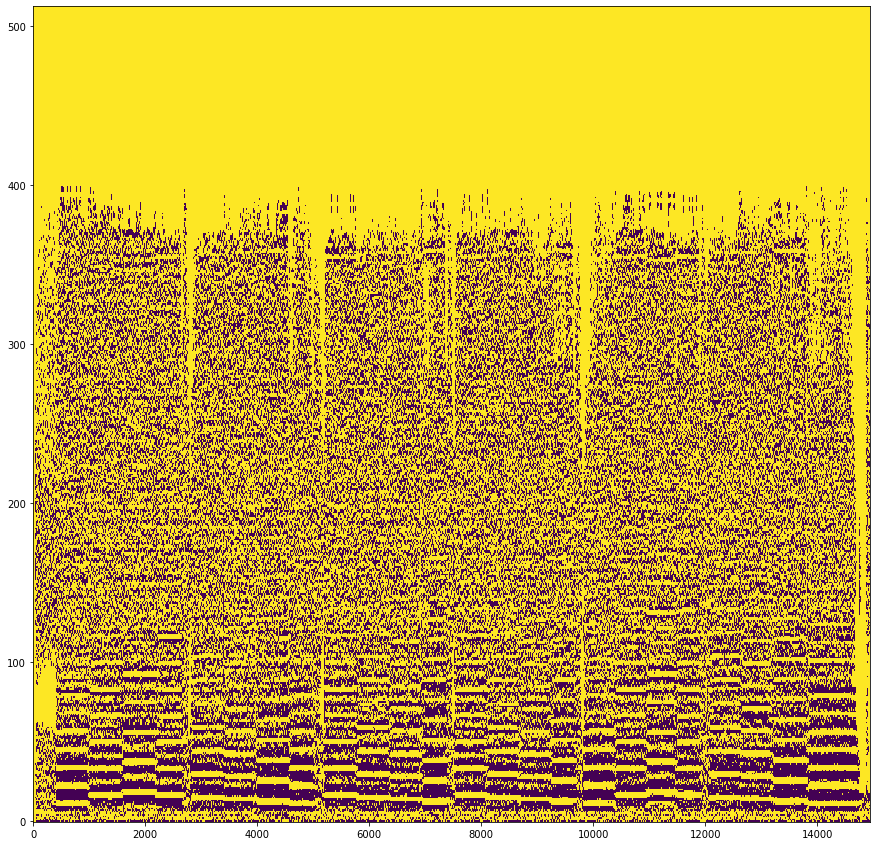

In [46]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(thresh ,aspect='auto')
ax.invert_yaxis()
plt.show()


In [47]:
print("Running cv2.findcontours")
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,\
                                        cv2.CHAIN_APPROX_NONE)


Running cv2.findcontours


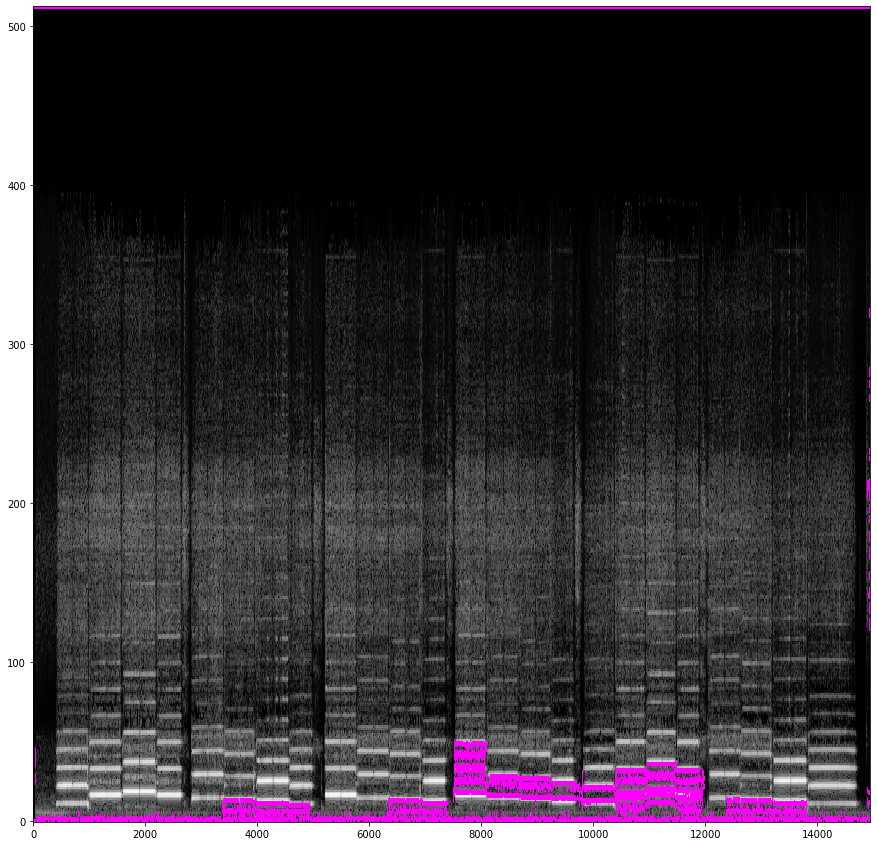

In [48]:
grey_spectro = cv2.cvtColor(spectro, cv2.COLOR_GRAY2BGR)

img = cv2.drawContours(grey_spectro, contours, -1, (255,0,255), 2)

f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(img,aspect='auto')
ax.invert_yaxis()
plt.show()